In [1]:
#https://tradewithpython.com/generating-buy-sell-signals-using-python

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')''
yf.pdr_override()

In [1]:
stocksymbols = ['AAPL']
startdate = date(2017,1,1)
end_date = date(2021,3,31)
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , start = start ,end= end )
    return data

NameError: name 'date' is not defined

In [4]:
cd ..

C:\Users\noahc\Value_Repo


In [5]:
"""
# Load stock price data from excel file
df_dict = pd.read_excel("data//raw//stock_dataXL.xlsx", sheet_name=None)
df_dict_price = df_dict.copy()
for key in df_dict_price:
    df_dict_price[key] = df_dict_price[key][['Date','Price']]

# Choose a stock to make predictions on
stock_df = df_dict_price['Russia - Sberbank Rossii PAO (S']
stock_df = stock_df.rename(columns = {"Price":"Close"})
mydata = stock_df[:-1]
"""

'\n# Load stock price data from excel file\ndf_dict = pd.read_excel("data//raw//stock_dataXL.xlsx", sheet_name=None)\ndf_dict_price = df_dict.copy()\nfor key in df_dict_price:\n    df_dict_price[key] = df_dict_price[key][[\'Date\',\'Price\']]\n\n# Choose a stock to make predictions on\nstock_df = df_dict_price[\'Russia - Sberbank Rossii PAO (S\']\nstock_df = stock_df.rename(columns = {"Price":"Close"})\nmydata = stock_df[:-1]\n'

In [6]:
data = getMyPortfolio(stocksymbols)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133327,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102957,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240786,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544474,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600
...,...,...,...,...,...,...
2021-03-24,122.820000,122.900002,120.070000,120.089996,118.661636,88530500
2021-03-25,119.540001,121.660004,119.000000,120.589996,119.155701,98844700
2021-03-26,120.349998,121.480003,118.919998,121.209999,119.768326,94071200


In [7]:
# Extract the 'Date' column and use it as the index
#data.loc[:, 'Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)

In [8]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [9]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133327,115127600,NaN,NaN,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102957,84472400,NaN,NaN,NaN,NaN
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240786,88774400,NaN,NaN,NaN,NaN
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544474,127007600,NaN,NaN,NaN,NaN
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-24,122.820000,122.900002,120.070000,120.089996,118.661636,88530500,124.892000,125.8569,NaN,NaN
2021-03-25,119.540001,121.660004,119.000000,120.589996,119.155701,98844700,124.398666,125.9096,NaN,NaN
2021-03-26,120.349998,121.480003,118.919998,121.209999,119.768326,94071200,123.934666,126.0331,NaN,NaN


In [11]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
...,...,...,...
2021-03-24,-1.870863,0.308671,-2.179534
2021-03-25,-1.860506,0.255223,-2.115728
2021-03-26,-1.781730,0.267199,-2.048929


In [12]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133327,115127600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102957,84472400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240786,88774400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544474,127007600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,122.820000,122.900002,120.070000,120.089996,118.661636,88530500,124.892000,125.8569,NaN,NaN,-1.870863,0.308671,-2.179534
2021-03-25,119.540001,121.660004,119.000000,120.589996,119.155701,98844700,124.398666,125.9096,NaN,NaN,-1.860506,0.255223,-2.115728
2021-03-26,120.349998,121.480003,118.919998,121.209999,119.768326,94071200,123.934666,126.0331,NaN,NaN,-1.781730,0.267199,-2.048929


In [13]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Close'][i] < df['Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [14]:
MACD_strategy = MACD_Strategy(data, 0.025)
MACD_strategy

In [15]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133327,115127600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102957,84472400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240786,88774400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544474,127007600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,122.820000,122.900002,120.070000,120.089996,118.661636,88530500,124.892000,125.8569,NaN,NaN,-1.870863,0.308671,-2.179534,NaN,NaN,False
2021-03-25,119.540001,121.660004,119.000000,120.589996,119.155701,98844700,124.398666,125.9096,NaN,NaN,-1.860506,0.255223,-2.115728,NaN,NaN,False
2021-03-26,120.349998,121.480003,118.919998,121.209999,119.768326,94071200,123.934666,126.0331,NaN,NaN,-1.781730,0.267199,-2.048929,NaN,NaN,True


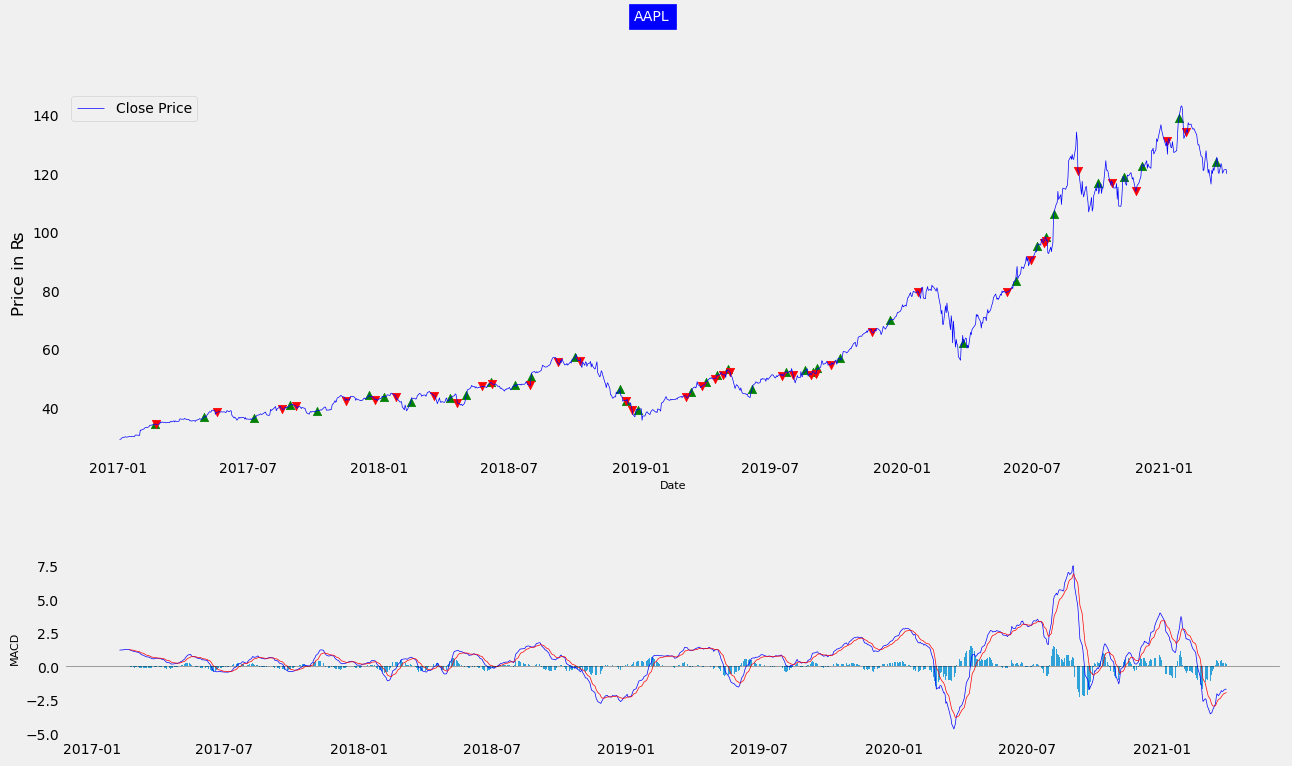

In [16]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume',width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

In [17]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Close'], length=20,std=2.0)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

In [18]:
#storing the function
data = bb_strategy(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,...,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133327,115127600,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102957,84472400,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240786,88774400,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544474,127007600,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,122.820000,122.900002,120.070000,120.089996,118.661636,88530500,124.892000,125.8569,NaN,NaN,...,NaN,NaN,False,117.048329,122.002499,126.956670,8.121425,0.306981,NaN,NaN
2021-03-25,119.540001,121.660004,119.000000,120.589996,119.155701,98844700,124.398666,125.9096,NaN,NaN,...,NaN,NaN,False,117.008949,121.982499,126.956050,8.154532,0.360009,NaN,NaN
2021-03-26,120.349998,121.480003,118.919998,121.209999,119.768326,94071200,123.934666,126.0331,NaN,NaN,...,NaN,NaN,True,117.004948,121.979999,126.955050,8.157159,0.422614,NaN,NaN


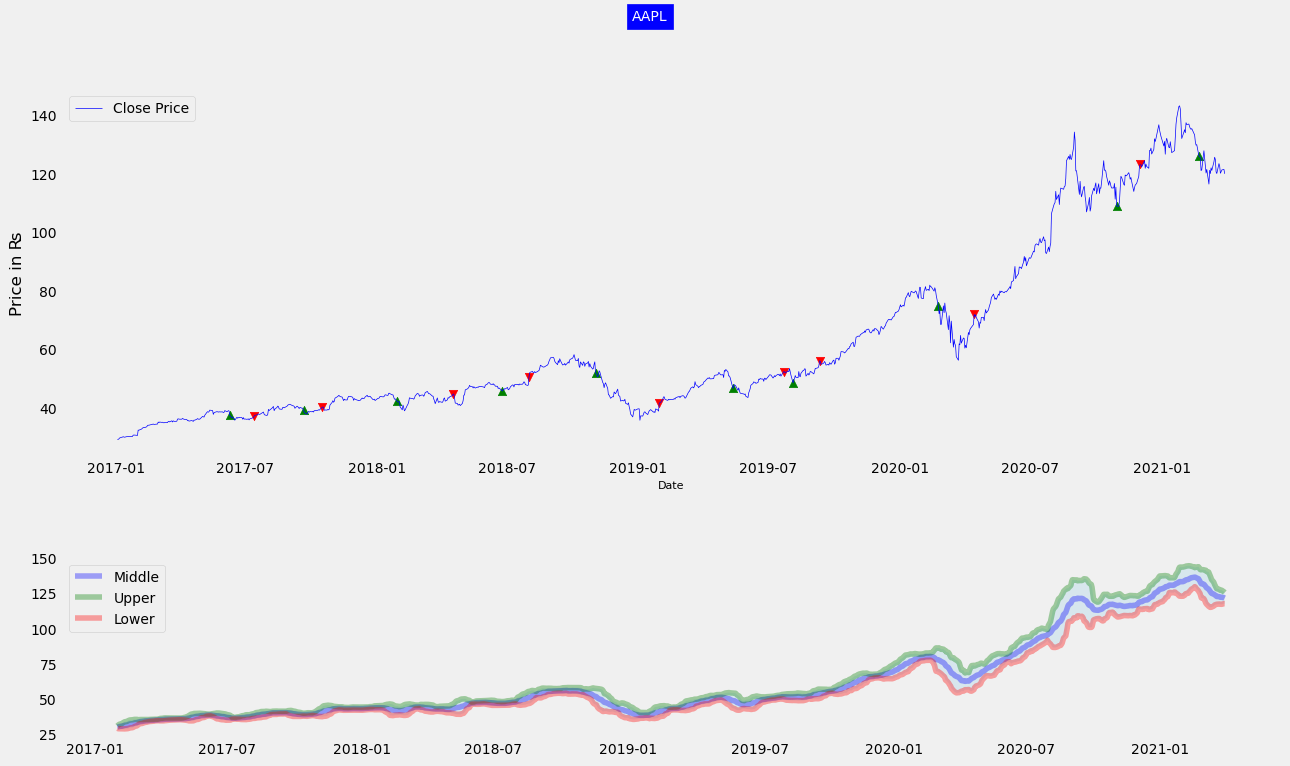

In [19]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()